![title](birds-nest-4-eggs.png)

###### image:https://www.publicdomainpictures.net/nl/view-image.php?image=61631&picture=vogels-nest-4-eieren

#   The effect of precipitation between March and July on the breeding of birds in the Netherlands 1990-2020 in changes compared to the year before.

Sources:

Dutch bird breeding per season as percentage compared to indexyear (all years and all birds manually selected):
https://opendata.cbs.nl/statline/#/CBS/nl/dataset/84498NED/table?ts=1673294982549

Monthly sum of precipitation in 0.1 mm (ROYAL NETHERLANDS METEOROLOGICAL INSTITUTE):
###### De Kooy: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_235_rh24.txt
###### De Bilt: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_260_rh24.txt
###### Leeuwarden: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_270_rh24.txt
###### Eelde: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_280_rh24.txt
###### Twenthe: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_290_rh24.txt
###### Schiphol: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_240_rh24.txt
###### Rotterdam: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_344_rh24.txt
###### Vlissingen: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_310_rh24.txt
###### Eindhoven: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_370_rh24.txt
###### Maastricht/Beek: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_380_rh24.txt

###### *Coordinates for the stations: http://climexp.knmi.nl/KNMIData/list_dx.txt
###### *geojson for provinces: https://www.webuildinternet.com/articles/2015-07-19-geojson-data-of-the-netherlands/provinces.geojson






In [1]:
#Importing all necessary libraries
import pandas as pd
import functions_final_assignment as fn
import numpy as np

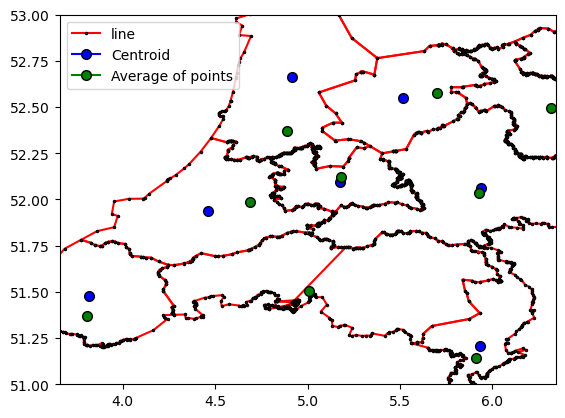

In [2]:
#Loading in the files with a yaml config file
config = fn.yaml_config()
#Loading the data into a dataframe
precipitation_df = fn.load_concat_df(config["precipitation"])
birds_df = pd.read_excel(io=config["breedingbirds"],sheet_name="Provinciale trends 1990-2020",skiprows=2)
#loading a dataframe with the centerpoints of the provinces
geo_df = fn.read_geojson("DATA/provinces.geojson")
geo_df.head(30)
#getting the middle points of the provinces.
geo_df["middle_point"] = [fn.get_centerpoint(data) for data in geo_df["geometry.coordinates"]]

geo_df = geo_df[["properties.name","middle_point"]]

# Every point except for the Y of Noord-brabant is calculated correctly, probably because of some encapulated regions
#this needs to be overwritten. 

In [3]:
geo_df.head(30)

,properties.name,middle_point
0,Drenthe,"[52.86220713249632, 6.619461381705654]"
1,Flevoland,"[52.550311702395504, 5.5136306312617895]"
2,Friesland (Fryslân),"[53.15279981753329, 5.691331306592688]"
3,Gelderland,"[52.0616876488688, 5.939038403735382]"
4,Groningen,"[53.260775669046, 6.730170242648468]"
5,Limburg,"[51.20937222366976, 5.933294457008429]"
6,Noord-Brabant,"[24.504315157089817, 5.0675833356904185]"
7,Noord-Holland,"[52.66356374904072, 4.913305503854767]"
8,Overijssel,"[52.44452872554086, 6.441743742211497]"
9,Utrecht,"[52.09651011043717, 5.173559958794818]"


In [4]:
#took the geographic mid point for brabant from google maps (its a monument)

geo_df["middle_point"].loc[6] = [51.562212646388495, 5.185266108595458]
geo_df.head(7)

,properties.name,middle_point
0,Drenthe,"[52.86220713249632, 6.619461381705654]"
1,Flevoland,"[52.550311702395504, 5.5136306312617895]"
2,Friesland (Fryslân),"[53.15279981753329, 5.691331306592688]"
3,Gelderland,"[52.0616876488688, 5.939038403735382]"
4,Groningen,"[53.260775669046, 6.730170242648468]"
5,Limburg,"[51.20937222366976, 5.933294457008429]"
6,Noord-Brabant,"[51.562212646388495, 5.185266108595458]"


In [5]:
precipitation_df.head(10)


,STN,YYYY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR
0,240,1951,,,,,,,,,,,,,
1,240,1952,,,,,,,,,,,,,
2,240,1953,,,,,,,,,,,,,
3,240,1954,,,,,,,,,,,,,
4,240,1955,,,,,,,,,,,,,
5,240,1956,,,,,,,,,,,,,
6,240,1957,,,,,,,,,,,,,
7,240,1958,,,,,,,,,,,,,
8,240,1959,,,,,,,,,,,,,
9,240,1960,,,,,,,,,,,,,


The precipitation data starts well before 1990, as we only need the data between 1990 and 2020 we can get rid of most data.
After that the amount of missing values may be calculated.

In [6]:
#select only the rows with the values in the YYYY column between 1990 and 2020
precipitation_df = precipitation_df[precipitation_df.YYYY.between(1990,2020)]
#Show the unique values for YYYY to see if the YYYY filtering is done correctly
print(f'{precipitation_df.YYYY.unique()}')


[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [7]:
#Calculated the amount of missing values
print(f'The amount of missing values are:\n {precipitation_df.isnull().sum()}')


The amount of missing values are:
 STN       0
YYYY      0
   JAN    0
   FEB    0
   MAR    0
   APR    0
   MAY    0
   JUN    0
   JUL    0
   AUG    0
   SEP    0
   OCT    0
   NOV    0
   DEC    0
  YEAR    0
dtype: int64


In [8]:
#convert all values to integers:

precipitation_df = precipitation_df.astype(int)

In [9]:
#Adding the location at which the station is found to the dataframe
stn_dict = fn.make_stn_dict(config["stn_coord"])
precipitation_df["COORD"] = [stn_dict[str(s)] for s in precipitation_df.STN]
precipitation_df.head()

,STN,YYYY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR,COORD
39,240,1990,463,1136,203,417,193,824,295,741,1157,601,1082,465,7577,"[52.32, 4.78]"
40,240,1991,459,282,230,383,280,1134,563,295,834,462,1268,506,6696,"[52.32, 4.78]"
41,240,1992,463,301,788,386,388,562,641,1357,579,1253,1228,614,8560,"[52.32, 4.78]"
42,240,1993,850,258,84,397,712,533,1617,669,1414,765,638,1478,9415,"[52.32, 4.78]"
43,240,1994,863,256,998,791,430,453,407,828,1472,1361,420,1256,9535,"[52.32, 4.78]"


In [10]:
#As we want to see the sum for precipitation between march and july
#A column will be added
precipitation_df["MAR-JUL"] = precipitation_df.iloc[:,4:9].T.sum()
precipitation_df = precipitation_df[["STN","YYYY","COORD","MAR-JUL"]]
precipitation_df.head()

,STN,YYYY,COORD,MAR-JUL
39,240,1990,"[52.32, 4.78]",1932
40,240,1991,"[52.32, 4.78]",2590
41,240,1992,"[52.32, 4.78]",2765
42,240,1993,"[52.32, 4.78]",3343
43,240,1994,"[52.32, 4.78]",3079


In [11]:
stn_df = precipitation_df[["STN","COORD"]]
stn_df = stn_df.drop_duplicates(subset=["STN"])


for c, column in enumerate(geo_df["properties.name"]):
    stn_df[f'dist_{column}'] = [fn.calc_point_dist(geo_df.iloc[c,1],x) for x in stn_df["COORD"]]

# Calculates the distance (sum of coordinates) between the weatherstations and the middle point of the province.
stn_df.head(12)

,STN,COORD,dist_Drenthe,dist_Flevoland,dist_Friesland (Fryslân),dist_Gelderland,dist_Groningen,dist_Limburg,dist_Noord-Brabant,dist_Noord-Holland,dist_Overijssel,dist_Utrecht,dist_Zeeland,dist_Zuid-Holland
39,240,"[52.32, 4.78]",1.917709,0.768933,1.234536,1.187474,2.165230,1.601119,0.859350,0.368519,1.666403,0.452589,1.281115,0.496587
89,260,"[52.1, 5.18]",1.628806,0.560437,1.170405,0.760005,1.936602,1.166478,0.537813,0.623482,1.307936,0.007325,1.500422,0.736070
84,235,"[52.93, 4.78]",1.840710,0.826061,0.938171,1.448218,1.978023,2.071388,1.426563,0.297924,1.731206,0.921735,1.743839,1.041071
39,270,"[53.22, 5.75]",0.940201,0.710178,0.089207,1.173637,0.981018,2.018965,1.751338,1.004828,1.039166,1.262740,2.604028,1.816877
84,280,"[53.12, 6.58]",0.260796,1.209003,0.889274,1.237278,0.205837,2.017108,2.090929,1.728064,0.689475,1.739427,3.216204,2.425302
39,290,"[52.27, 6.88]",0.646985,1.394826,1.480631,0.963744,1.002041,1.421683,1.836596,2.005687,0.471730,1.715237,3.166025,2.440772
84,310,"[51.45, 3.6]",3.333388,2.207412,2.696886,2.417698,3.616196,2.345669,1.589233,1.788158,3.010747,1.701196,0.216496,0.990752
33,344,"[51.97, 4.45]",2.345761,1.211640,1.714619,1.491859,2.620168,1.666948,0.840777,0.834076,2.047491,0.734536,0.803712,0.033411
39,370,"[51.45, 5.38]",1.878987,1.108397,1.731027,0.828665,2.258732,0.603354,0.224751,1.300208,1.454781,0.678670,1.565527,1.040166
84,380,"[50.9, 5.77]",2.138186,1.670106,2.254173,1.173922,2.548566,0.349823,0.883425,1.960633,1.684283,1.336928,2.038837,1.670435


Most of the provinces have good coverage, however the province of Noord-Brabant is too far away from all the stations to predict the average precipitation there. 


mu (robust) = 2865.0, sigma (robust) = 663.27


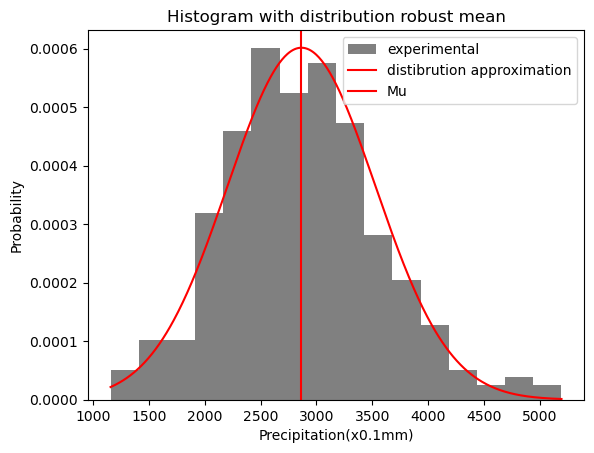

In [12]:
#plot to see if the rain in March and July is normally distributed
#Also to see what the mean and deviation is. 
fn.hist_robust_dist(precipitation_df["MAR-JUL"])

There is some right skewedness as wheather extremes are not uncommon. A longer tail is observed in the data.
Tried to fit a gamma distribution to adjust for the longer tail, but it was finicky to adjust.

In [13]:
#New column with "condition" give the values higher than mu + sigma "wet" and mu - sigma as "dry", the rest (the middle) as "normal"
mu = 2865
sigma = 663.27
lower_lim = mu - sigma
upper_lim = mu + sigma

precipitation_df["CONDITION"] = [fn.validate_precipitation(i,lower_lim,upper_lim) for i in precipitation_df["MAR-JUL"]]



In [14]:
#Print the amount of conditions seen in the dataframe

dry_count = len(precipitation_df[precipitation_df["CONDITION"]=="dry"])
wet_count = len(precipitation_df[precipitation_df["CONDITION"]=="wet"])
normal_count = len(precipitation_df[precipitation_df["CONDITION"]=="normal"])
print(f'The amount of dry years: {dry_count}\n'
f'The amount of wet years: {wet_count}\n'
f'The amount of normal years: {normal_count}')

The amount of dry years: 54
The amount of wet years: 52
The amount of normal years: 204


In [15]:
#and now prepare the data in the birds df:

birds_df.head()

,nr.,Soort,Wetenschappelijke naam,English name,Provincie,1990,1991,1992,1993,1994,...,2015,2016,2017,2018,2019,2020,Trend 1990-2020,Percentage jaarlijkse verandering vanaf 1990,Trend 2009-2020,Percentage jaarlijkse verandering vanaf 2009
0,1,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Drenthe,0.00,1.23,10.53,16.70,17.52,...,93.38,100.43,99.68,97.36,88.31,100.0,sterke toename (++),12.825678,matige toename (+),4.285238
1,2,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Friesland,0.00,0.00,0.75,0.44,0.88,...,74.90,64.16,53.41,57.92,65.94,100.0,sterke toename (++),20.507127,matige toename (+),4.495473
2,3,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Gelderland,1.14,1.16,1.83,2.31,2.51,...,109.62,131.93,124.18,118.74,110.66,100.0,sterke toename (++),17.690644,matige toename (+),7.092411
3,4,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Groningen,1.12,0.97,1.27,1.42,2.23,...,108.18,99.20,76.87,108.10,120.74,100.0,sterke toename (++),16.975959,matige toename (+),6.507661
4,5,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Limburg,0.00,0.00,0.00,0.00,0.33,...,58.92,77.85,79.85,94.13,107.41,100.0,sterke toename (++),24.159061,matige toename (+),4.280005


Some descriptives in the first three and in the last four columns we do not need. 

In [16]:
#drop the first three and the last four columns
birds_df = birds_df.iloc[:,3:-4]

birds_df.head()

,English name,Provincie,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Greater Canada Goose,Drenthe,0.00,1.23,10.53,16.70,17.52,16.06,11.72,12.20,...,71.87,78.13,107.33,112.29,93.38,100.43,99.68,97.36,88.31,100.0
1,Greater Canada Goose,Friesland,0.00,0.00,0.75,0.44,0.88,1.85,2.82,6.57,...,57.19,64.06,47.20,59.07,74.90,64.16,53.41,57.92,65.94,100.0
2,Greater Canada Goose,Gelderland,1.14,1.16,1.83,2.31,2.51,1.84,2.60,7.02,...,97.12,74.71,87.06,102.24,109.62,131.93,124.18,118.74,110.66,100.0
3,Greater Canada Goose,Groningen,1.12,0.97,1.27,1.42,2.23,3.51,6.26,10.14,...,87.40,75.17,58.37,79.40,108.18,99.20,76.87,108.10,120.74,100.0
4,Greater Canada Goose,Limburg,0.00,0.00,0.00,0.00,0.33,2.32,3.57,4.55,...,52.71,91.98,80.00,64.19,58.92,77.85,79.85,94.13,107.41,100.0


In [17]:
#change the values to delta precentage change

birds_df = birds_df.T
birds_df.head()



,0,1,2,3,4,5,6,7,8,9,...,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233
English name,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,...,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting
Provincie,Drenthe,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Utrecht,Zeeland,Zuid-Holland,...,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland
1990,0.0,0.0,1.14,1.12,0.0,0.0,0.94,0.0,0.0,0.0,...,100.0,NaN,100.0,NaN,100.0,100.0,NaN,NaN,NaN,100.0
1991,1.23,0.0,1.16,0.97,0.0,0.4,0.33,0.0,0.0,0.0,...,77.35,NaN,83.08,NaN,94.99,84.47,NaN,NaN,NaN,92.27
1992,10.53,0.75,1.83,1.27,0.0,0.56,1.84,0.0,0.0,0.05,...,94.51,NaN,122.07,NaN,97.2,100.47,NaN,NaN,NaN,92.43


In [18]:
#replace the data with percentage change, with 1990 as 0. np.inf is converted to zero.
birds_df.iloc[2:,2:] = birds_df.iloc[2:,2:].pct_change().replace({np.inf:0})
birds_df.head(10)



,0,1,2,3,4,5,6,7,8,9,...,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233
English name,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,Greater Canada Goose,...,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting,Common Reed Bunting
Provincie,Drenthe,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Utrecht,Zeeland,Zuid-Holland,...,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland
1990,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,1.23,0.0,0.017544,-0.133929,NaN,0.0,-0.648936,NaN,NaN,NaN,...,-0.2265,NaN,-0.1692,NaN,-0.0501,-0.1553,NaN,NaN,NaN,-0.0773
1992,10.53,0.75,0.577586,0.309278,NaN,0.4,4.575758,NaN,NaN,0.0,...,0.221849,NaN,0.469307,NaN,0.023266,0.189416,NaN,NaN,NaN,0.001734
1993,16.7,0.44,0.262295,0.11811,NaN,2.339286,-0.684783,NaN,NaN,1.4,...,0.105386,NaN,0.253461,NaN,-0.002984,0.044292,NaN,NaN,NaN,0.355512
1994,17.52,0.88,0.08658,0.570423,0.0,2.374332,-0.724138,NaN,NaN,8.666667,...,0.037427,NaN,-0.086007,NaN,0.0259,-0.004766,0.1708,NaN,NaN,-0.067364
1995,16.06,1.85,-0.266932,0.573991,6.030303,0.540412,0.1875,NaN,0.0,0.577586,...,-0.01301,NaN,-0.037326,NaN,0.072621,0.025953,-0.268278,NaN,NaN,-0.06564
1996,11.72,2.82,0.413043,0.783476,0.538793,0.591564,1.578947,NaN,-0.190476,0.956284,...,-0.096569,NaN,0.205303,NaN,-0.038353,0.045365,0.095016,NaN,NaN,-0.062099
1997,12.2,6.57,1.7,0.619808,0.27451,0.053006,2.734694,NaN,10.352941,0.346369,...,0.123758,-0.0217,-0.123313,-0.1791,0.087177,0.081614,-0.144867,NaN,-0.0609,-0.041602
